In [100]:

import lightkurve




In [101]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download(quality_bitmask='hardest');

In [102]:
%matplotlib inline

KeplerTargetPixelFile Object (ID: 8462852)

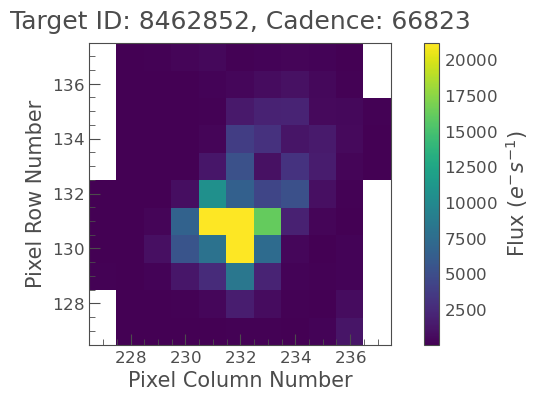

In [103]:
pixelfile.plot(frame=100);
pixelfile

In [104]:
lc = pixelfile.to_lightcurve(aperture_mask='all');
lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
object,float32,float32,float64,float64,int32,int32
1472.1177793449679,258645.03125,18.723051071166992,231.9673225173918,131.14635857005212,66713,0
1472.1382122338982,258660.046875,18.72334861755371,231.9671381956879,131.1455329599996,66714,0
1472.1586449230672,258690.078125,18.723417282104492,231.96697751093495,131.14547901637522,66715,0
1472.1790778124705,258683.328125,18.72397232055664,231.96678360583206,131.14500604059887,66716,0
1472.1995106019822,258655.40625,18.723506927490234,231.96657673426097,131.14489915411463,66717,0
1472.2199432917332,258663.15625,18.723569869995117,231.96699753628025,131.14502413754656,66718,0
1472.2403761816604,258686.71875,18.724145889282227,231.96669495657952,131.14451785560516,66719,0
1472.2608089718124,258663.28125,18.724172592163086,231.96668273644525,131.14450988662415,66720,0


In [105]:
lc.time, lc.flux

(<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.89718798 1557.9380561
  1557.95849016]>,
 <Quantity [258645.03, 258660.05, 258690.08, ..., 258929.86, 258884.66,
            258865.6 ] electron / s>)

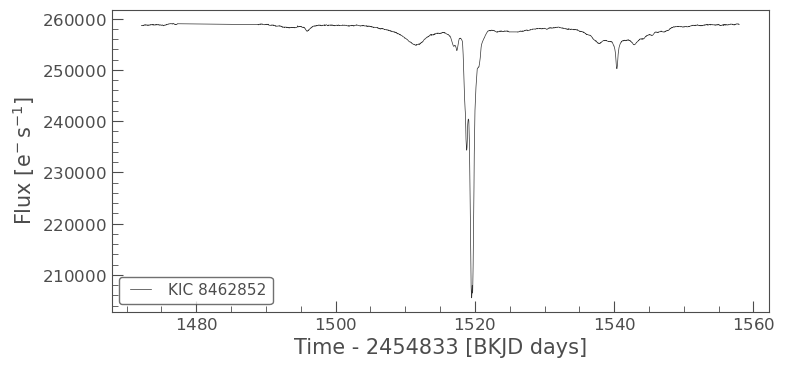

In [106]:
lc.plot();

In [107]:
pixelfile.interact()



In [108]:
pixelFile = search_targetpixelfile('KIC 6922244', quarter=4).download()

C:\Users\hp\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [109]:
lc = pixelFile.to_lightcurve(aperture_mask=pixelFile.pipeline_mask)

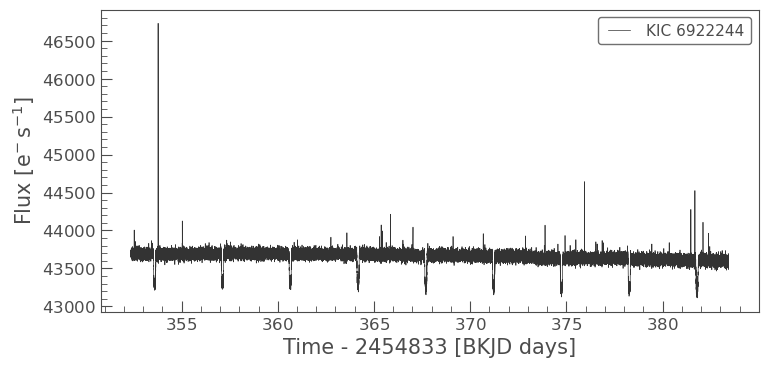

In [110]:
lc.plot();

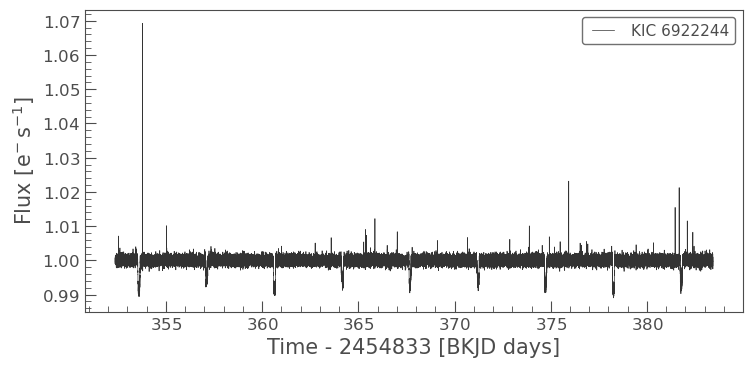

In [111]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

In [117]:
transit_time_1=360.5
transit_time_2=364
period_of_orbit=transit_time_2-transit_time_1
print('Orbital period in days: {:.1f}'.format(period_of_orbit))



Orbital period in days: 3.5


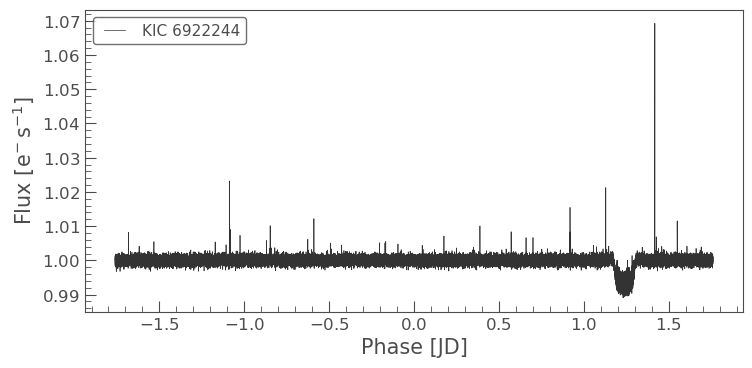

In [113]:
folded_lc = flat_lc.fold(period=3.522)
folded_lc.plot();

In [118]:
lc.remove_nans();

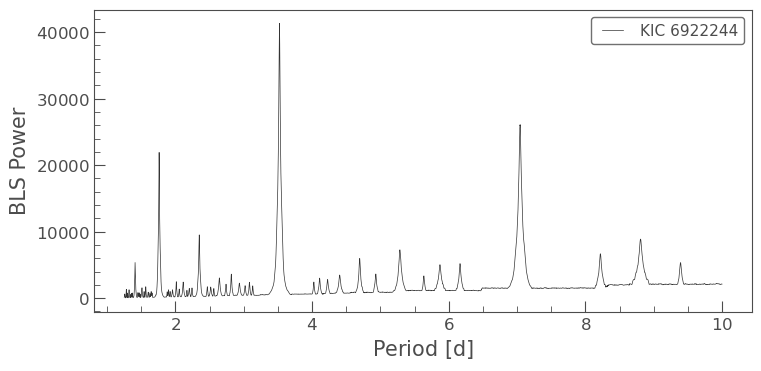

In [119]:
import numpy as np
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(1.25, 10, 0.001))
periodogram.plot();


In [120]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.5f}'.format(best_fit_period))

Best fit period: 3.52200 d


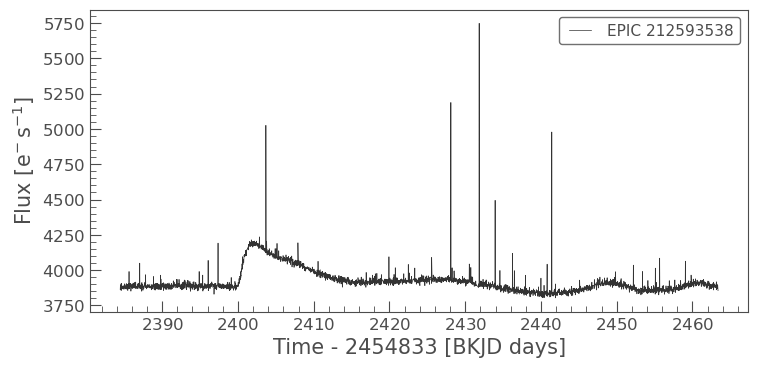

In [121]:
tpf = search_targetpixelfile('EPIC 212593538', campaign=6).download()
lc = tpf.to_lightcurve(aperture_mask='all')
lc.plot();

In [122]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np

In [123]:
TIC='TIC 55525572'



In [124]:
available_data_select=lk.search_lightcurve(TIC, author='SPOC')[0:9]

In [125]:
lc_collection=available_data_select.download_all().stitch()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

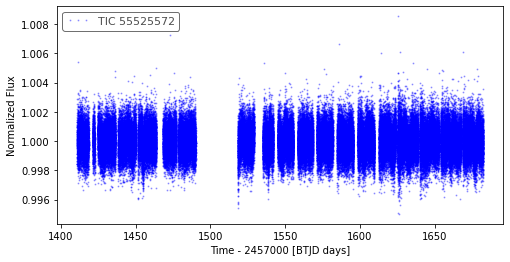

In [126]:
fig, ax=plt.subplots(figsize=(8,4))
lc_collection.plot(ax=ax, linewidth=0, marker='o', color='blue', markersize=1, alpha=0.3)

In [127]:
period=83.8979
t0=2125.847
#defining the orbital period and the time of the first transit event

In [128]:
lc_phased=lc_collection.fold(period=period, epoch_time=t0)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

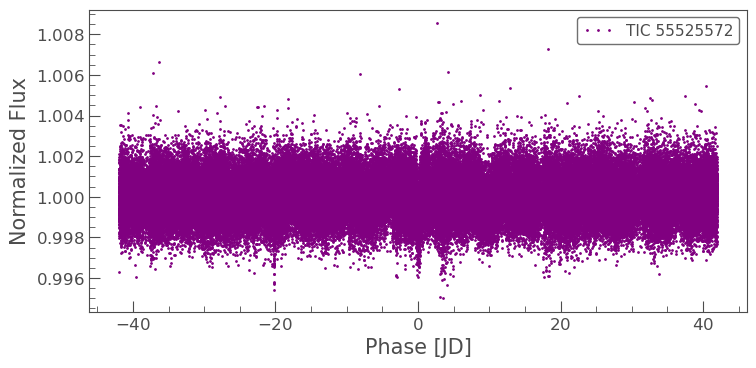

In [129]:
lc_phased.plot( linewidth=0, color='purple', marker='.')

In [130]:
lc_phased_bined=lc_phased.bin(15/24/60)

(0.996, 1.004)

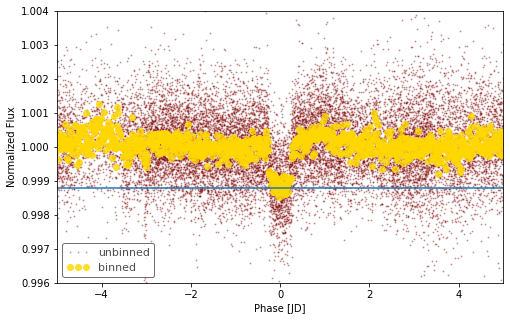

In [131]:
fig,ax=plt.subplots(figsize=(8,5))
lc_phased.plot(ax=ax, marker='.', color='maroon',linewidth=0, alpha=0.3, markersize=2, label='unbinned')
lc_phased_bined.plot(ax=ax, marker='o',linewidth=0, color='gold', alpha=0.8, markersize=6, label='binned')

plt.axhline(0.9988)
plt.xlim(-5,5)
plt.ylim(0.996, 1.004)




In [132]:
from astropy import units as u
import numpy as np


In [133]:
transit_depth =1 - 0.9988
radius_star = 2.04354*u.Rsun

radius_planet = np.sqrt(transit_depth)*radius_star

In [134]:
radius_planet

<Quantity 0.0707903 solRad>

In [135]:
earth_radius_planet= radius_planet.to(u.Rearth)
earth_radius_planet

<Quantity 7.72154924 earthRad>